**Importing required packages**

In [34]:
%tensorflow_version 2.x

In [35]:
import tensorflow
tensorflow.__version__

'2.8.0'

**Mount Google drive if you are using google colab**

In [36]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Change current working directory to project folder**

In [37]:
import os
os.chdir("/content/drive/My Drive/Project 2/")

**Extracting the zip file**

In [38]:
from zipfile import ZipFile
with ZipFile('Aligned+Face+Dataset+from+Pinterest+-+CV+project+1.zip', 'r') as z:
  z.extractall()

**Function to load images**

In [39]:
import numpy as np
import os

class IdentityMetadata():
    def __init__(self, base, name, file):
        # print(base, name, file)
        # dataset base directory
        self.base = base
        # identity name
        self.name = name
        # image file name
        self.file = file

    def __repr__(self):
        return self.image_path()

    def image_path(self):
        return os.path.join(self.base, self.name, self.file) 
    
def load_metadata(path):
    metadata = []
    for i in os.listdir(path):
        for f in os.listdir(os.path.join(path, i)):
            # Check file extension. Allow only jpg/jpeg' files.
            ext = os.path.splitext(f)[1]
            if ext == '.jpg' or ext == '.jpeg':
                metadata.append(IdentityMetadata(path, i, f))
    return np.array(metadata)

# metadata = load_metadata('images')
metadata = load_metadata('PINS')

**Defining function to load image**

In [40]:
import cv2
def load_image(path):
    img = cv2.imread(path, 1)
    # OpenCV loads images with color channels
    # in BGR order. So we need to reverse them
    return img[...,::-1]

**Loading a sample image**

In [41]:
import matplotlib.pyplot as plt
img1 = str(metadata[0])
print(img1)
load_image(img1)

PINS/pins_Aaron Paul/Aaron Paul0_262.jpg


array([[[233, 188, 165],
        [231, 186, 163],
        [220, 178, 156],
        ...,
        [106,  63,  72],
        [106,  63,  72],
        [106,  63,  72]],

       [[232, 187, 164],
        [233, 188, 165],
        [220, 178, 156],
        ...,
        [106,  63,  72],
        [106,  63,  72],
        [106,  63,  72]],

       [[230, 186, 161],
        [228, 184, 159],
        [206, 164, 140],
        ...,
        [106,  63,  72],
        [106,  63,  72],
        [106,  63,  72]],

       ...,

       [[198, 118,  91],
        [197, 120,  94],
        [195, 119,  95],
        ...,
        [ 78,  66,  76],
        [ 78,  66,  76],
        [ 78,  66,  76]],

       [[200, 120,  93],
        [200, 120,  93],
        [198, 121,  95],
        ...,
        [ 78,  66,  76],
        [ 78,  66,  76],
        [ 78,  66,  76]],

       [[201, 121,  94],
        [201, 121,  94],
        [199, 122,  96],
        ...,
        [ 78,  66,  76],
        [ 78,  66,  76],
        [ 78,  66,  76]]

**VGG Face model**

In [42]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import ZeroPadding2D, Convolution2D, MaxPooling2D, Dropout, Flatten, Activation

def vgg_face():	
    model = Sequential()
    model.add(ZeroPadding2D((1,1),input_shape=(224,224, 3)))
    model.add(Convolution2D(64, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(128, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(128, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(Convolution2D(4096, (7, 7), activation='relu'))
    model.add(Dropout(0.5))
    model.add(Convolution2D(4096, (1, 1), activation='relu'))
    model.add(Dropout(0.5))
    model.add(Convolution2D(2622, (1, 1)))
    model.add(Flatten())
    model.add(Activation('softmax'))
    return model

**Loading the model**

In [43]:
model = vgg_face()
model.load_weights('vgg_face_weights.h5')

**vgg_face_descriptor**

In [44]:
from tensorflow.keras.models import Model
print(model.layers[0].input)
print(model.layers[-2].output)
vgg_face_descriptor = Model(inputs=model.layers[0].input, outputs=model.layers[-2].output)

KerasTensor(type_spec=TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name='zero_padding2d_13_input'), name='zero_padding2d_13_input', description="created by layer 'zero_padding2d_13_input'")
KerasTensor(type_spec=TensorSpec(shape=(None, 2622), dtype=tf.float32, name=None), name='flatten_1/Reshape:0', description="created by layer 'flatten_1'")


**Generating embeddings for each image in the dataset**

In [45]:
# Get embedding vector for first image in the metadata using the pre-trained model

img_path = metadata[0].image_path()
img = load_image(img_path)

# Normalising pixel values from [0-255] to [0-1]: scale RGB values to interval [0,1]
img = (img / 255.).astype(np.float32)

img = cv2.resize(img, dsize = (224,224))
print(img.shape)

# Obtain embedding vector for an image
# Get the embedding vector for the above image using vgg_face_descriptor model and print the shape 

embedding_vector = vgg_face_descriptor.predict(np.expand_dims(img, axis=0))[0]
print(embedding_vector.shape)

(224, 224, 3)
(2622,)


**Generating embeddings for all the images**

In [46]:
def gen_embed(m):
  img_path = m.image_path()
  img = load_image(img_path)
  
  # Normalising pixel values from [0-255] to [0-1]: scale RGB values to interval [0,1]
  img = (img / 255.).astype(np.float32)
  
  img = cv2.resize(img, dsize = (224,224))
  #print(img.shape)
  
  # Obtain embedding vector for an image
  # Get the embedding vector for the above image using vgg_face_descriptor model and print the shape 
  embedding_vector = vgg_face_descriptor.predict(np.expand_dims(img, axis=0))[0]
  #print(embedding_vector.shape)

  return embedding_vector

# Get for first image
gen_embed(metadata[0])

array([ 0.03170303, -0.0150513 , -0.01243402, ...,  0.0004314 ,
        0.0021908 , -0.00908097], dtype=float32)

In [47]:
# embedding list
embeddings = np.zeros((metadata.shape[0], 2622))

print(metadata.size)

#Taking lesser images to save time
for i, m in enumerate(metadata):
  embeddings[i] = gen_embed(m)

print('size of each embedding:', len(embeddings[0]))

10770
size of each embedding: 2622


In [65]:
embeddings[0].shape

(2622,)

(2622,)

**Function to calculate distance between given 2 pairs of images.**

In [49]:
def distance(emb1, emb2):
    return np.sum(np.square(emb1 - emb2))

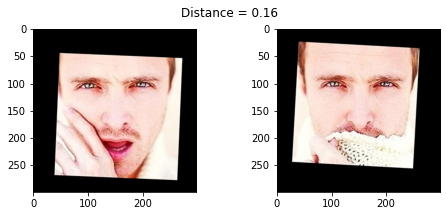

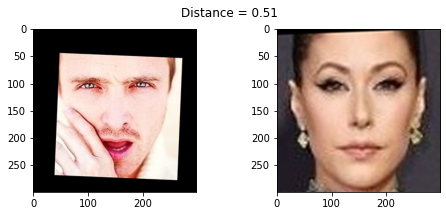

In [50]:
import matplotlib.pyplot as plt

def show_pair(idx1, idx2):
    plt.figure(figsize=(8,3))
    plt.suptitle(f'Distance = {distance(embeddings[idx1], embeddings[idx2]):.2f}')
    plt.subplot(121)
    plt.imshow(load_image(metadata[idx1].image_path()))
    plt.subplot(122)
    plt.imshow(load_image(metadata[idx2].image_path()));    

show_pair(2, 3)
show_pair(2, 180)

**Creating train and test sets**

In [51]:
train_idx = np.arange(metadata.shape[0]) % 9 != 0
test_idx = np.arange(metadata.shape[0]) % 9 == 0


X_train = embeddings[train_idx]
X_test = embeddings[test_idx]

y = np.array([m.name for m in metadata])
y_train = y[train_idx]
y_test = y[test_idx]

**Encoding the Labels**

In [52]:
from sklearn.preprocessing import LabelEncoder


le = LabelEncoder()
y_train_en = le.fit_transform(y_train)
y_test_en = le.transform(y_test)

**Standardizing the feature values**

In [53]:
# Standarize features
from sklearn.preprocessing import StandardScaler
scal = StandardScaler()


X_train_scaled = scal.fit_transform(X_train)
X_test_scaled = scal.fit_transform(X_test)

**Dimension Reduction using PCA**

In [54]:
from sklearn.decomposition import PCA

pca = PCA(.97)
pca.fit(X_train_scaled)
X_train_pca = pca.transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

In [55]:
pca.n_components_

501

**Build a Classifier**

In [56]:
from sklearn.svm import SVC

clf = SVC()
clf.fit(X_train_pca,y_train_en)

SVC()

In [57]:
#Model score on training data
clf.score(X_train_pca,y_train_en)

0.997388488457119

In [10]:
#Model score on test
clf.score(X_test_pca,y_test_en)

NameError: ignored

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [60]:
import tensorflow as tf
path = "/content/drive/My Drive/Project 2/Benedict+Cumberbatch9.jpg"

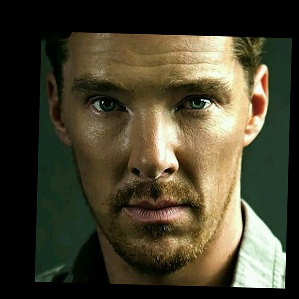

In [61]:
Load_image1 = tf.keras.preprocessing.image.load_img(path)
Load_image1

In [62]:
path = "/content/drive/My Drive/Project 2/Dwayne+Johnson4.jpg"

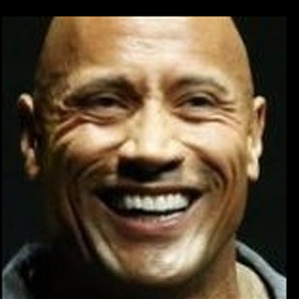

In [63]:
Load_image2 = tf.keras.preprocessing.image.load_img(path)
Load_image2

**Test results**

In [9]:
import warnings
# Suppress LabelEncoder warning
warnings.filterwarnings('ignore')

example_idx = 1

example_image = load_image(metadata[test_idx][example_idx].image_path())
example_image_scal = scal.transform([embeddings[test_idx][example_idx]])
example_image_pca = pca.transform(example_image_scal)
example_prediction = clf.predict(example_image_pca)
example_identity = le.inverse_transform(example_prediction)[0]

plt.imshow(example_image)
plt.title(f'Identified as {example_identity}');

NameError: ignored